## Классификация изображений сверточная сеть

In [16]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

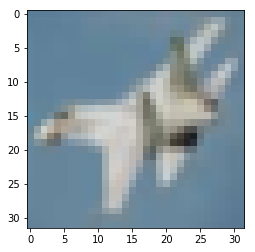

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = X_test[10]

plt.imshow(img)

## Нормализуем входне данные

In [18]:
nb_classes = 10

# Размер изображений
img_rows, img_cols = 32, 32

# Количество каналов в изображении: RGB
img_channels = 3

# Нормализуем данные
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

## Построим нейросеть

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем

In [20]:
historey = model.fit(X_train, Y_train,
                     batch_size=64,
                     epochs=10,
                     validation_split=0.1,
                     shuffle=True,
                     verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 182s 4ms/step - loss: 1.5175 - acc: 0.4520 - val_loss: 1.1937 - val_acc: 0.5826
Epoch 2/10
45000/45000 [==============================] - 179s 4ms/step - loss: 1.1647 - acc: 0.5840 - val_loss: 1.0374 - val_acc: 0.6380
Epoch 3/10
45000/45000 [==============================] - 177s 4ms/step - loss: 1.0005 - acc: 0.6447 - val_loss: 0.9414 - val_acc: 0.6664
Epoch 4/10
45000/45000 [==============================] - 177s 4ms/step - loss: 0.8891 - acc: 0.6859 - val_loss: 0.8815 - val_acc: 0.6924
Epoch 5/10
45000/45000 [==============================] - 177s 4ms/step - loss: 0.7961 - acc: 0.7187 - val_loss: 0.8399 - val_acc: 0.7144
Epoch 6/10
45000/45000 [==============================] - 178s 4ms/step - loss: 0.7135 - acc: 0.7479 - val_loss: 0.8286 - val_acc: 0.7180
Epoch 7/10
45000/45000 [==============================] - 178s 4ms/step - loss: 0.6430 - acc: 0.7711 - val_loss: 0.8138 - v

## Выведем статистику обучения

Populating the interactive namespace from numpy and matplotlib


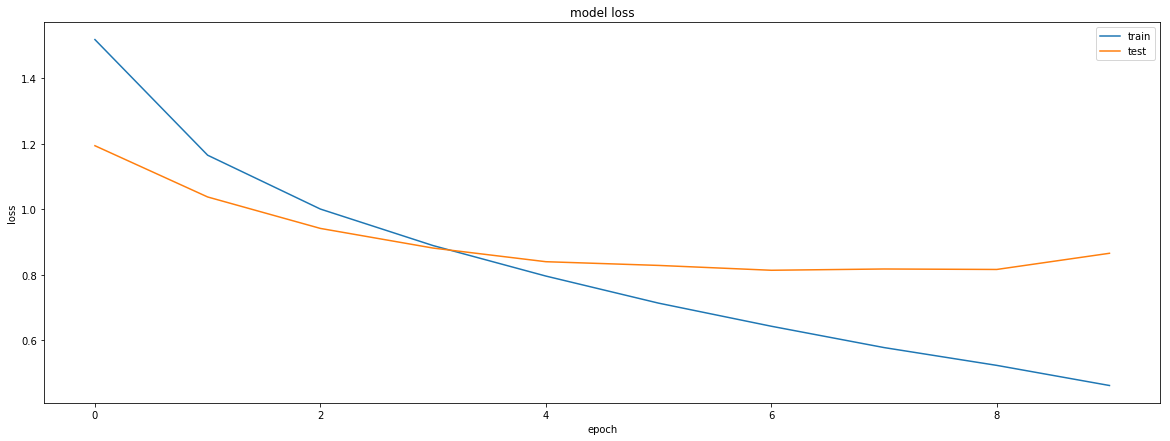

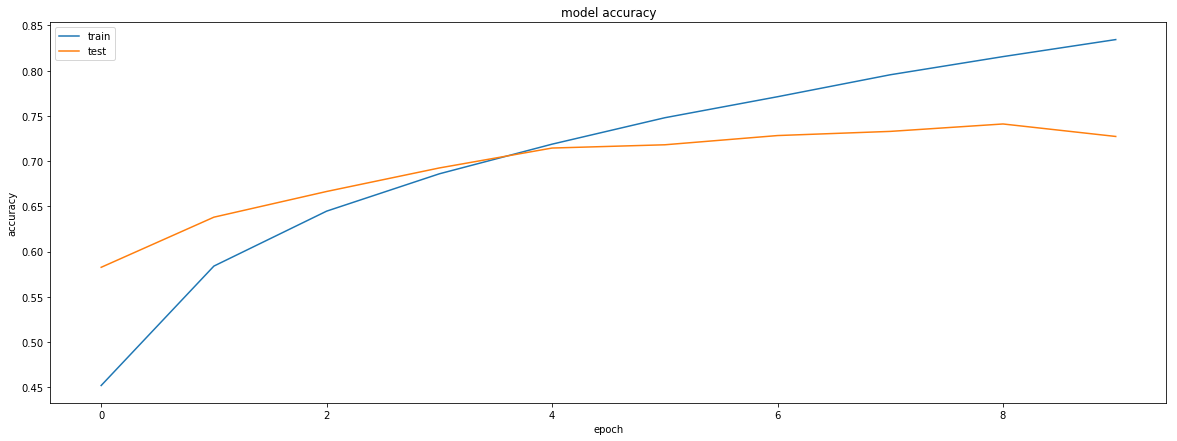

In [23]:
%pylab inline
history = historey
plt.figure(figsize(20,7))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Проверим точность на тестовых данных

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))